>Below is a copied and translated version of seaborn tutorial (v0.12.2) from the seaborn official docs.
>
>해당 내용은 seaborn 공식 문서에서 제공하는 seaborn 튜토리얼(v0.12.2)의 단순 필사 및 번역본입니다.  
>     
> © Copyright 2012-2022, Michael Waskom. (https://seaborn.pydata.org/tutorial.html#)

# 범주형  데이터 시각화
Visualizing categorical data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

우리는 [relational plot tutorial](https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial)에서 여러 변수의 관계를 시각화하는 방법에 대해 알아봤습니다. 
여기서는 두 변수가 수치형인 경우만 예제로 다뤘습니다. 
이와 달리 변수 중에 범주형(categorical; 범위가 구분됨)이 있는 경우, 이에 맞는 접근법이 필요합니다.  
<br>
seaborn에는 범주형 데이터가 포함된 관계를 시각화할 수 있는 몇가지 방법이 있습니다. 
`relplot()`과 `scatterplot()`, `lineplot()`의 관계처럼, 지금 알아볼 플롯도 만드는 방법은 2가지가 있습니다. 
범주형 데이터를 plot하는 몇가지의 axes-level function이 있고, 이 함수들을 합쳐놓은 상위 레벨의 figure-level function인 `catplot()`이 있습니다.  
<br>
범주형 플롯의 종류는 크게 3가지로 나뉜다고 보면 됩니다. 
자세한 내용은 아래에서 살펴보겠습니다 :

Categorical scatterplots 범주형 산점도 :
* `stripplot()` (`kind="strip"` ; default) 
* `swarmplot()` (`kind="swarm"`)  

<br>

Categorical distribution plots 범주형 분포도 :
* `boxplot() (`kind="box"`)
* `violinplot() (`kind="violin"`)
* `boxenplot() (`kind="boxen"`)  

<br>

Categorical estimate plots :
* `pointplot()` (`kind="point"`)
* `barplot()` (`kind="bar"`)
* `countplot()` (`kind="count"`)


이러한 분류는 데이터가 세분화된 레벨에 따라 달라집니다. 
어떤 질문에 대한 답을 할 것인지를 정하고 그에 따라 어떤 방법을 사용할지 결정해야 합니다. 
통합 API를 사용하면 여러 종류의 plot을 쉽게 전환하고 다양한 관점에서 데이터를 볼 수 있다는 장점이 있습니다.  
  
이번 장에서는 주로 figure-level interface 인 `catplot()`에 대해 다룰 것입니다. 이 plot이 다른 function들을 포함하는 function (a higher-level interface)이라는 것을 기억하세요. 각 plot 예제마다 다른 방법으로도 표현을 해볼 예정이지만 세부적인 내용은 API 문서를 참고해주세요.

## 범주형 scatterplot
Categorical scatterplots

`catplot()`은 default 표현으로 scatterplot을 사용합니다. 
seaborn에는 범주형 데이터를 나타내는 scatter plot 으로 2종류가 있습니다. 
범주형 데이터를 scatterplot으로 나타내는데 가장 중요한 문제는 같은 범주에 속한 point들이 동일한 축 위에 (일렬로 겹쳐서) 위치하게 된다는 것입니다. 
그리고 이 문제를 어떤 방식으로 접근하느냐에 따라 plot의 종류가 나뉜다고 볼 수 있습니다.
`catplot()`의 default "kind"인 `stripplot()`은 랜덤한 "jitter(불안정한 진동이나 주기)"를 적용해서 데이터 포인트들의 위치를 약간씩 조정합니다 :

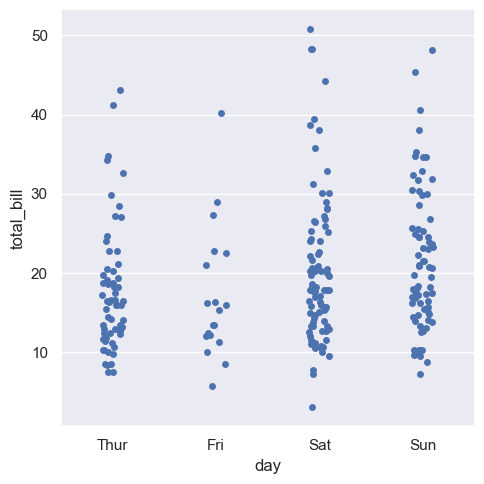

In [2]:
tips = sns.load_dataset('tips')
sns.catplot(data=tips, x='day', y='total_bill');

`jitter` parameter로 jitter의 세기를 조절하거나 없앨 수도 있습니다.

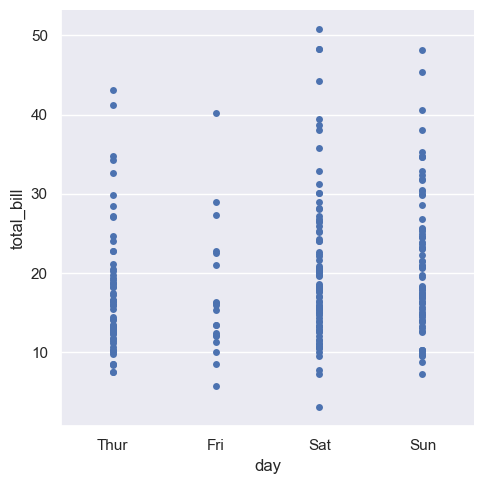

In [3]:
# sns.scatterplot(data=tips, x='day', y='total_bill')
sns.catplot(data=tips, x='day', y='total_bill', jitter=False);

두 번째 방법은 point가 겹치지 않게 하는 알고리즘을 사용해서 축을 따라 위치를 조정합니다. 
이 방법은 상대적으로 작은 크기의 데이터셋에만 적용 가능하지만, 관측값의 분포를 더 잘 표현해줍니다. 
이런 종류를 "벌집(beeswarm)"이라고 부르기도 하는데, seaborn에서는 `catplot()`을 `kind="swarm"`으로 설정하면 `swamplot()`이 그려집니다.

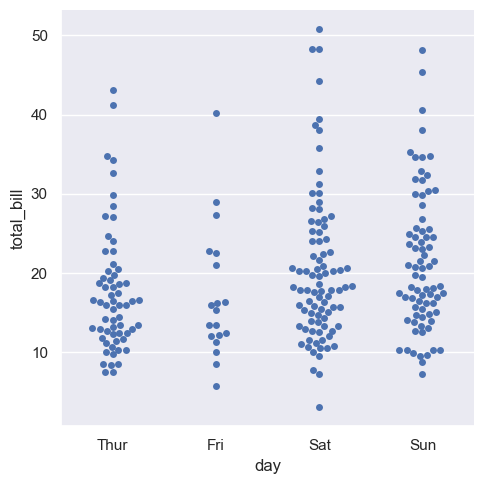

In [4]:
sns.catplot(data=tips, x='day', y='total_bill', kind='swarm');

Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic. (The categorical plots do not currently support size or style semantics). Each different categorical plotting function handles the hue semantic differently. For the scatter plots, it is only necessary to change the color of the points:

관계형(relational) plot과 마찬가지로, 범주형 plot에서도 `hue` semantic을 사용해서 새로운 차원을 추가할 수 있습니다. 
(범주형 plot은 현재 `size`나 `style` semantic을 지원하지 않습니다.) 
`hue` semantic을 다루는 방식은 각 범주형 plot마다 달라지는데, scatter plot에서는 point의 color만을 변경하면 됩니다 :

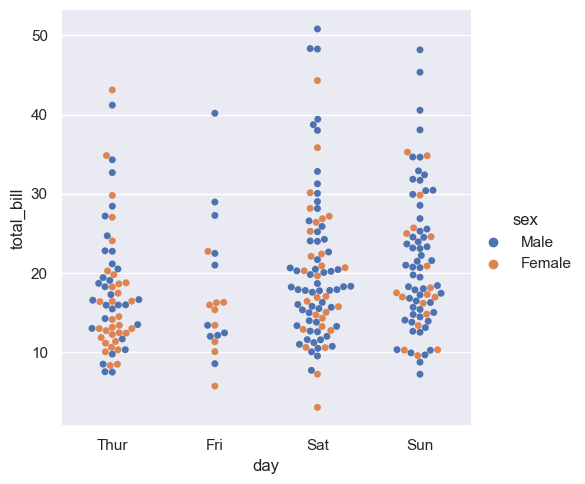

In [5]:
sns.catplot(data=tips, x='day', y='total_bill', hue='sex', kind='swarm');

수치형 데이터와 달리, 범주형 변수는 level을 정하고 정렬하는 기준이 항상 명확하지는 않습니다. 
보통, seaborn의 categorical plooting function은 dat에서의 범주의 순서를 가져오려고 합니다. 
데이터가 pandas `Categorical` datatype일 경우에는 해당 카테고리 default order를 가져와서 반영합니다. 
그리고 범주형 axis에 전달된 변수가 수치형처럼 보일 경우, 이에 따라 level이 정렬됩니다. 
단, 숫자를 사용해서 레이블을 지정했더라도 데이터는 여전히 범주형으로 취급되어 그려집니다 (ex. 범주형 축 0, 1, ...) :

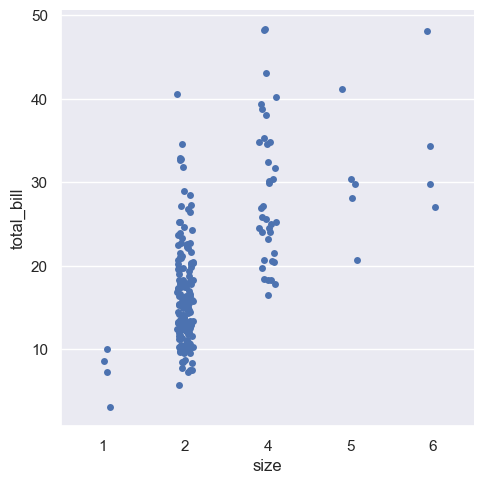

In [6]:
sns.catplot(data=tips.query('size != 3'), x='size', y='total_bill');

기본설정 순서(default order)를 선택하는 또 다른 옵션은 데이터셋에 표시되는대로 카테고리의 수준(level)을 그대로 사용하는 것입니다. 
`order` parameter를 이용해서 구체적인 순서를 설정할 수도 있습니다. 
이 기능은 같은 figure에 여러개의 범주형 plot을 그릴 때 특히 유용할 수 있는데, 자세한 내용은 아래에서 살펴보겠습니다 :

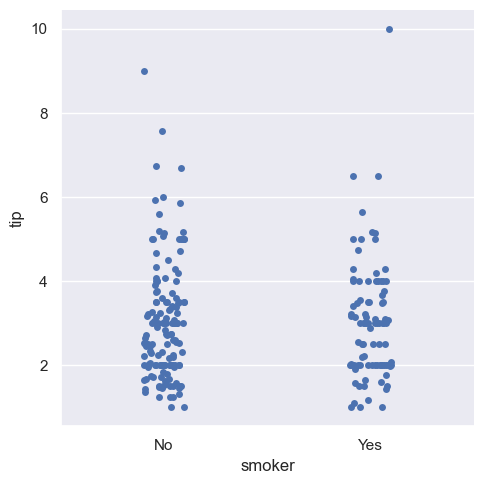

In [7]:
sns.catplot(data=tips, x='smoker', y='tip', order=["No", "Yes"]);

위에서 우리는 "범주형 축(categorical axis)"에 대해 언급했습니다. 
그리고 지금까지 예제에서는 이 범주형 축이 항상 가로 축에 해당했습니다.  
  
그러나 항상 범주형 축이라고 항상 가로 축(horizontal axis)이 되는 것은 아닙니다. 
상황에 따라 (범주 이름이 길거나 카테고리가 많은 경우) 세로 축(vertical axis)에 배치하는 것이 더 좋을 수도 있습니다. 이럴 때는 변수를 축에 바꿔서(swap) 할당하면 됩니다.

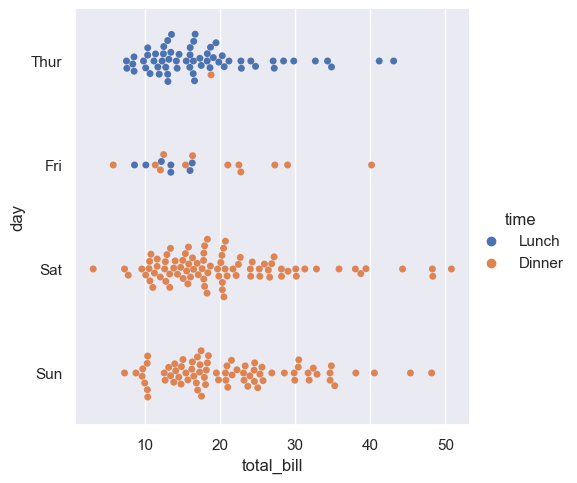

In [8]:
sns.catplot(data=tips, x='total_bill', y='day', hue='time', kind='swarm');

## 분포 비교
Comparing distributions

데이터셋의 크기가 커지면, 범주형 산점도(categorical scatter plots)는 각 범주별 값의 분포에 관한 정보를 전달하는데 한계가 있습니다. 
이럴 경우 분포를 요약해서 보면 범주의 level에 따라 쉽게 비교할 수 있습니다. 
아래는 분포를 요약하는 방법들입니다 :

### 박스플롯
Boxplots

첫번째는 우리에게 익숙한 `boxplot()`입니다. 
boxplot 종류의 플롯은 분포의 세 사분위수(25%, 50%, 75%)와 극단값을 보여줍니다. 
box의 위아래로 1.5 IQR 내에 있는 지점까지는 "수염(whiskers)"으로 표현되고, 이 범위를 벗어난 관측값은 독립적으로 표현됩니다. 
즉, 박스 플롯의 각 값은 데이터의 실제 관측값에 해당합니다.

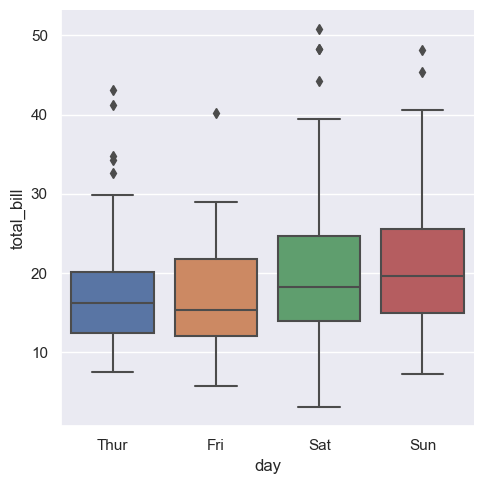

In [9]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box');

`hue` semantic을 추가하면, 상자가 겹쳐지지 않도록 semantic변수의 level 별로 분리된 상자가 범주 축을 따라 이동됩니다.

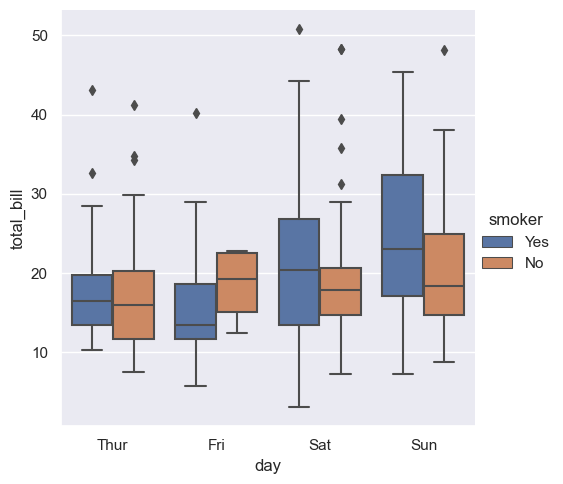

In [10]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', kind='box');

이런 방식을 "돗징(dodging; 회피, 피하기)"라고 합니다. 
이 기능은 seaborn이 semantic 변수가 categorical 변수 안에 중첩(nested)되어 있다고 가정하기 때문에 자동(default)으로 적용됩니다. 
만약 그렇지 않은 경우에는 사용자가 직접 dodging을 끄면 됩니다.

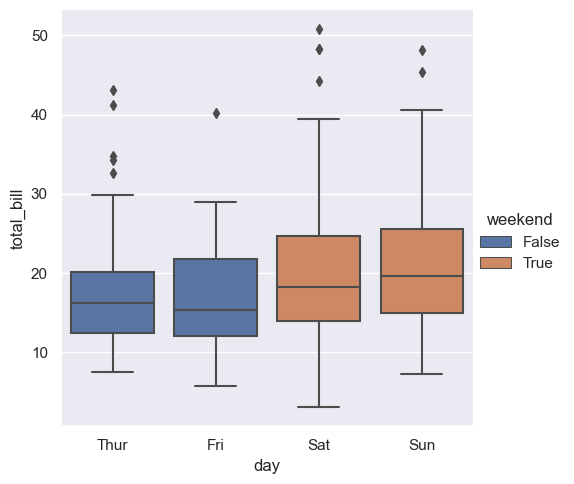

In [11]:
tips['weekend'] = tips['day'].isin(['Sat', 'Sun'])
sns.catplot(
    data=tips, x='day', y='total_bill', hue='weekend',
    kind='box', dodge=False,
);

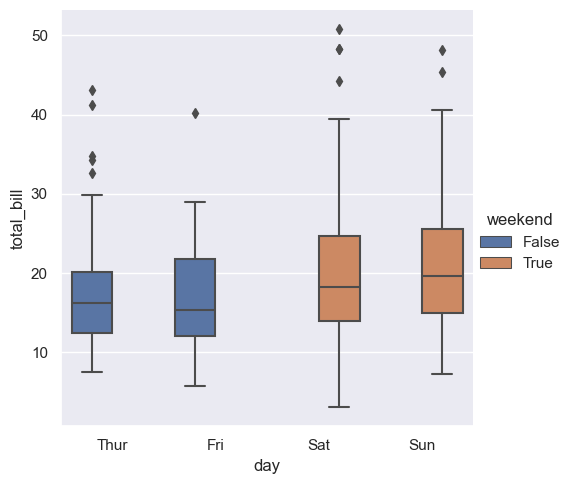

In [12]:
sns.catplot(
    data=tips, x='day', y='total_bill', hue='weekend',
    kind='box',
);

비슷한 함수로 `boxenplot()`이 있습니다. 
`boxenplot()`은 `boxplot()`과 비슷하지만 분포의 모양에 대해 좀 더 자세한 정보를 표시해주는데 최적화되어 있어서, 큰 데이터셋의 분포를 표현하는데 적합합니다.

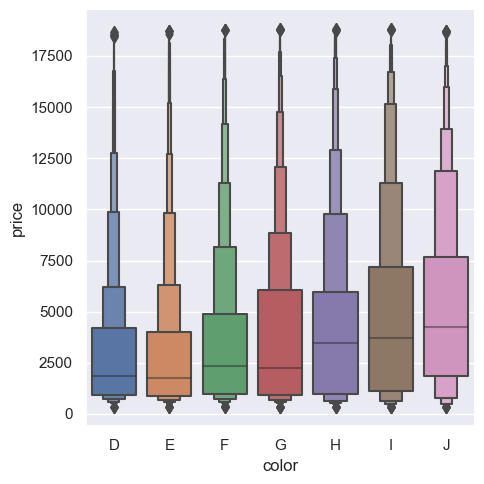

In [13]:
diamonds = sns.load_dataset('diamonds')
sns.catplot(
    data=diamonds.sort_values('color'),
    x='color', y='price', kind='boxen',
);

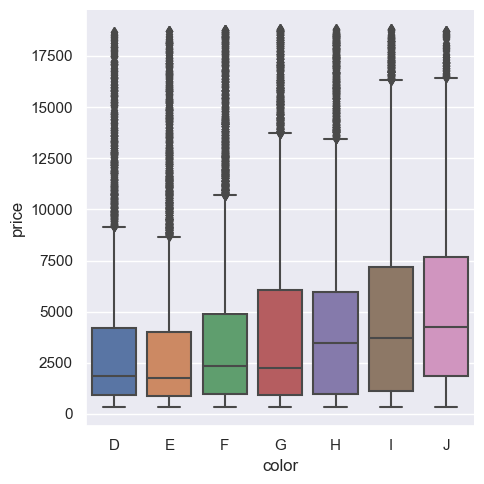

In [14]:
sns.catplot(
    data=diamonds.sort_values('color'),
    x='color', y='price', kind='box',
);

### 바이올릿플롯
Violinplots

또 다른 방법으로는 `violipot()`이 있습니다. `violinplot()`에서는 distribution tutorial에서 배웠던 kernel density estimation과 boxplot을 결합한 형태라고 보면 됩니다 :

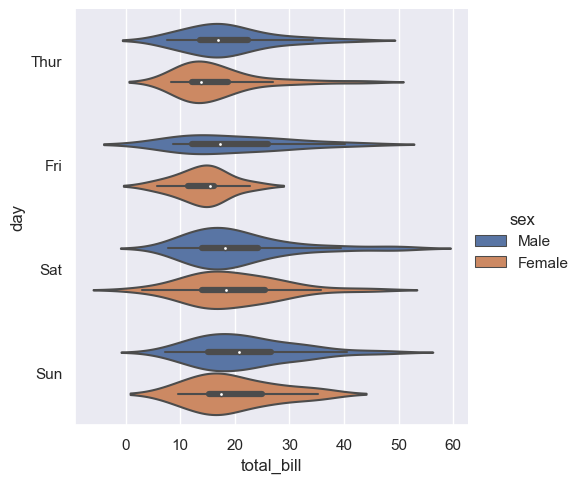

In [15]:
sns.catplot(
    data=tips, x='total_bill', y='day', hue='sex', kind='violin',
);

이 플롯은 분포에 대해 보다 많은 정보를 전달하기 위해서 kernel density estimate를 사용하고 있습니다. 
boxplot에서 나타냈던 사분위수(quartile)와 수염(whisker)에 해당하는 값들도 violin안에 보입니다.   
   
대신 단점은, KDE를 사용하기 때문에 그냥 boxplot 보다는 상대적으로 복잡하고 조정이 필요한 parameter들이 있습니다 :

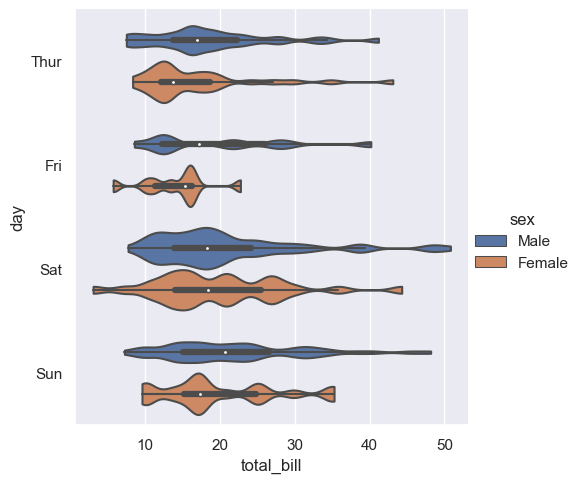

In [16]:
sns.catplot(
    data=tips, x='total_bill', y='day', hue='sex',
    kind='violin', bw=.15, cut=0,
);

hue에 2개의 level만 있을 경우에는 violin을 "쪼갤(split)" 수도 있습니다. 
이러면 공간을 더 효율적으로 사용할 수 있습니다.

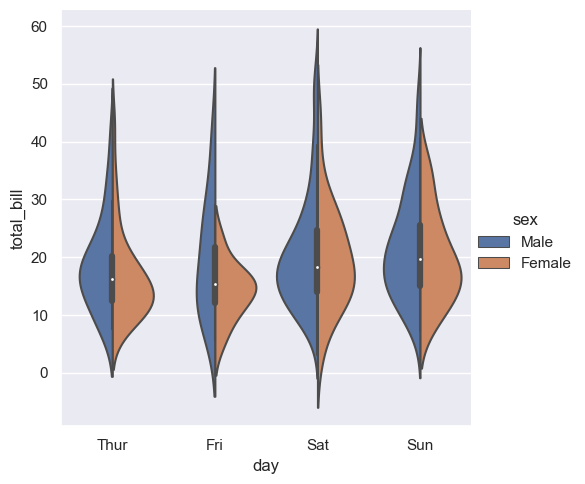

In [17]:
sns.catplot(
    data=tips, x='day', y='total_bill', hue='sex', 
    kind='violin', split=True,
);

마지막으로, violin 내부에 뭔가를 그려주는 옵션도 있습니다. 
예를 들어, boxplot의 요약 값이 아닌 각각의 관측치를 표시할 수도 있습니다 :

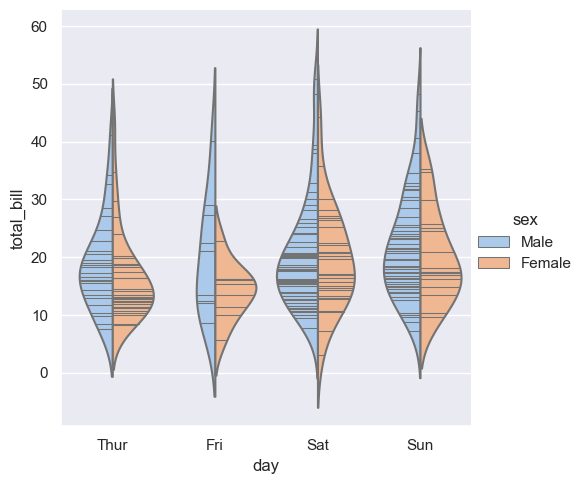

In [18]:
sns.catplot(
    data=tips, x='day', y='total_bill', hue='sex',
    kind='violin', split=True, inner='stick', palette='pastel',
);

`boxplot`, `violinplot`을 `swarmplot()`, `stripplot()`과 합쳐서 분포에 대한 요약과 관측치를 함께 보여주는 것도 좋은 방법입니다 :

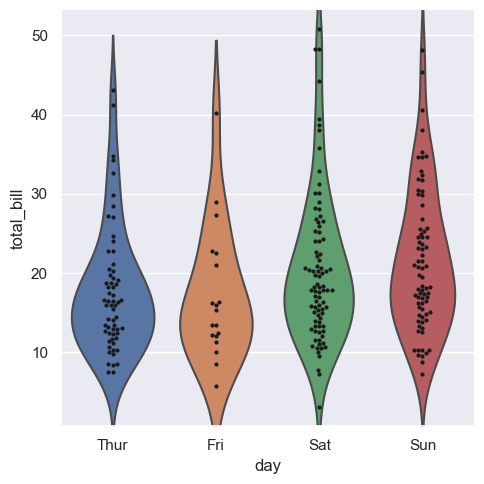

In [19]:
g = sns.catplot(data=tips, x='day', y='total_bill', kind='violin', inner=None)
sns.swarmplot(data=tips, x='day', y='total_bill', color='k', size=3, ax=g.ax);

## 중심 경향성 추정
Estimating central tendency

상황에 따라서 각 카테고리 내의 분포 대신에 값의 중앙 경향에 대한 추정치를 표현하고 싶을 수 있습니다. 
seaborn에서는 이 정보를 2가지 방법으로 보여줄 수 있습니다. 
중요한 건, 이럴 때 사용하는 API가 기본적으로 우리가 위에서 본 것과 같습니다.

### 막대(bar) 플롯
Bar plots

이 목표를 달성하는데 우리에게 아주 익숙한 방법을 사용할 수 있습니다. 
seaborn에서 `barplot()` function은 전체 데이터셋에서 함수를 적용하여 추정치(estimate; 기본설정은 평균mean)를 구합니다. 
각 범주에 여러개의 관측값이 있을 경우, 부트스트래핑(bootstrapping)을 사용해서 추정치 주변의 신뢰구간을 구하고 error bar로 나타냅니다.

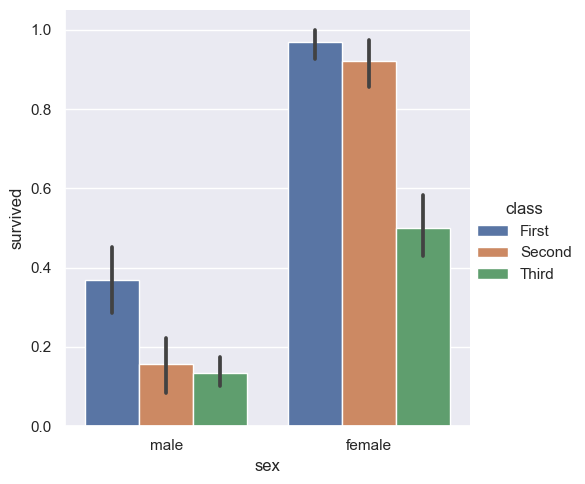

In [20]:
titanic = sns.load_dataset('titanic')
sns.catplot(data=titanic, x='sex', y='survived', hue='class', kind='bar');

seaborn(v0.12부터)에서 error bar는 기본적으로 95%의 신뢰구간을 표현하지만, 사용자가 신뢰도를 특정할 수 있습니다.

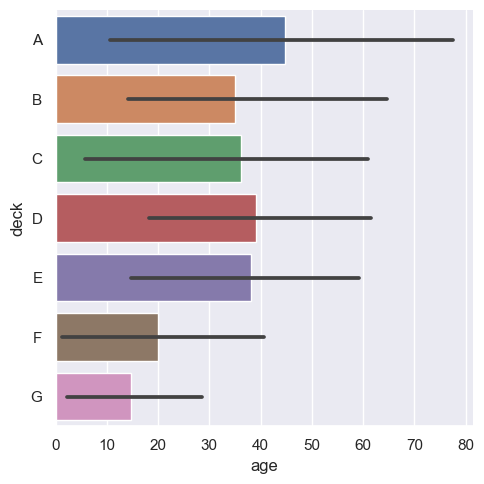

In [21]:
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 95), kind="bar");

barplot 중에서도 카테고리별 관찰횟수를 표현하는 경우는 조금 특별합니다. 
이럴 경우 두 번째 변수에 대한 통계 계산 대신 관찰횟수만 보여주게 되는데, 정량적인 차트가 아닌 범주형 변수에 대한 histogram과 비슷해집니다. 
seaborn에서는 `countplot()`으로 이를 구현할 수 있습니다.

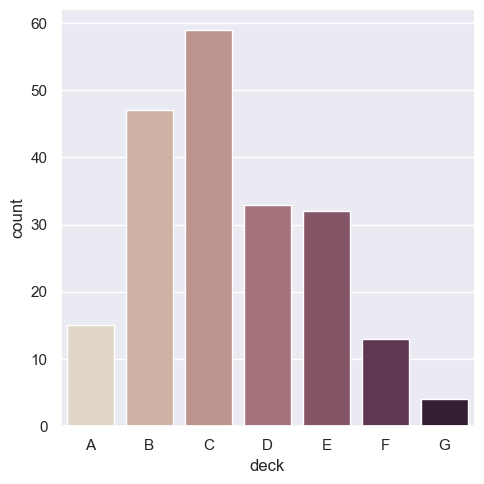

In [22]:
sns.catplot(data=titanic, x='deck', kind='count', palette='ch:.25');

`barplot()`과 `countplot()` 모두 위에서 설명한 모든 옵션들을 사용하여 호출할 수 있습니다. 
(각 함수별 추가 옵션들은 공식문서에서 확인하세요.)

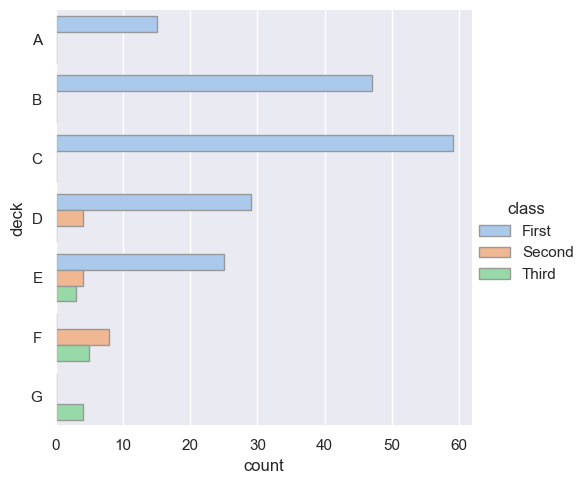

In [23]:
sns.catplot(
    data=titanic, y='deck', hue='class', kind='count',
    palette='pastel', edgecolor='.6',
);

### 점(point) 플롯
Point plots

똑같은 정보를 `pointplot()` function으로 전달할 수도 있습니다. 
이 함수도 다른 축의 높이에 대해 추정치(the value of the estimate)를 인코딩하지만, 전체 막대를 표시하는 대신 포인트로 추정치와 신뢰구간을 나타냅니다. 
그리고 같은 `hue` 카테고리에 있는 점들을 연결해서 보여주기 떄문에 기울기(slope)의 차이를 통해 주요 관계가 어떻게 변하는지 쉽게 알 수 있습니다 :

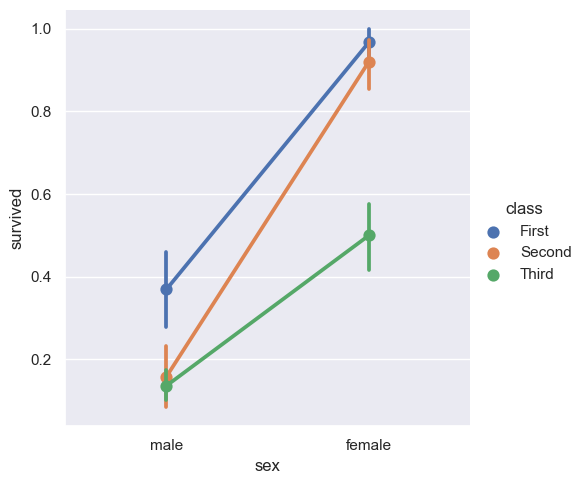

In [24]:
sns.catplot(data=titanic, x='sex', y='survived', hue='class', kind='point');

범주형(categorical) 함수에는 관계형(relational) 함수의 `style` semantic이 없지만, marker나 linestyle을 hue와 함께 적용하는 것도 좋은 방법입니다. (이러면 흑백 출력물에서도 구별될 수 있습니다.)

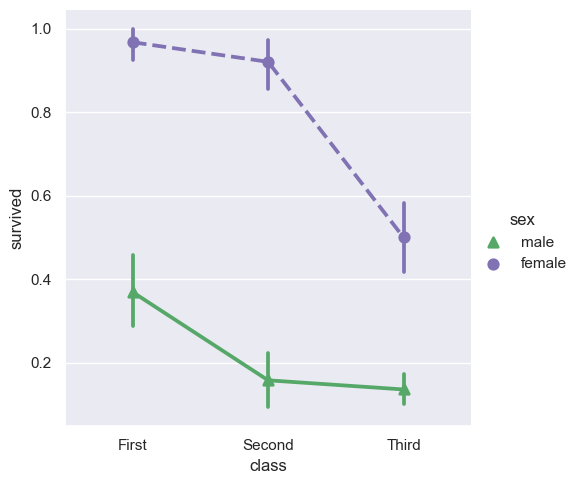

In [27]:
sns.catplot(
    data=titanic, x='class', y='survived', hue='sex',
    palette={'male':'g', 'female':'m'},
    markers=['^', 'o'], linestyles=['-', '--'],
    kind='point'
);

## 추가적인 차원 표현
Showing additional dimensions

`relplot()`과 마찬가지로 `catplot()`도 `FacetGrid`를 기반으로 되어 있습니다. 
즉, facet 변수를 추가하여서 고차원 관계를 쉽게 시각화할 수 있습니다.

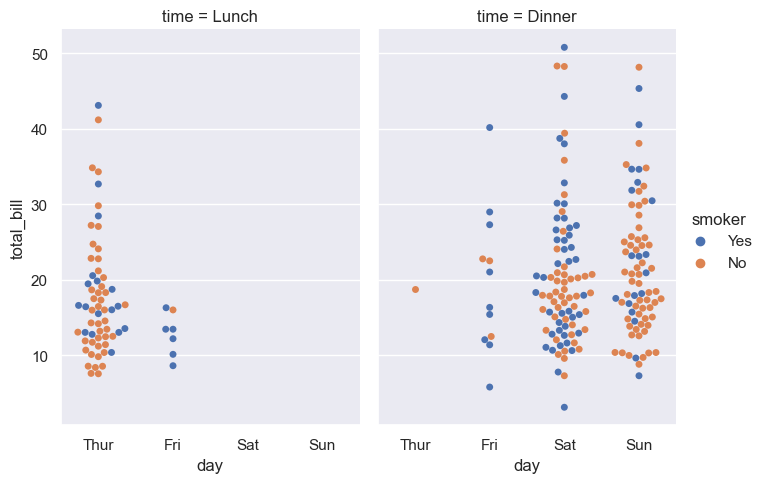

In [31]:
sns.catplot(
    data=tips, x='day', y='total_bill', hue='smoker',
    kind='swarm', col='time', aspect=.7,
);

추가적으로, return되는 FacetGrid object에 method를 사용해서 plot을 더 커스터마이즈 할 수 있습니다.

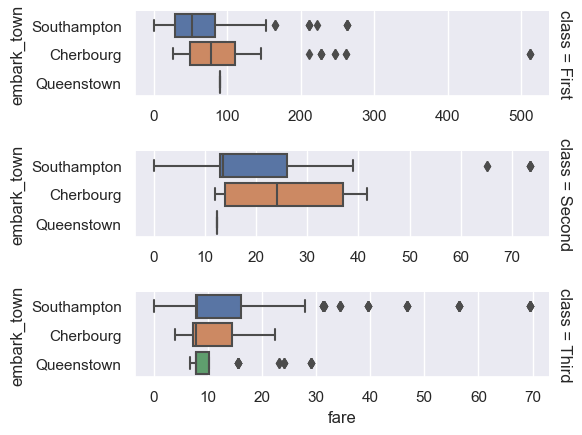

In [32]:
g = sns.catplot(
    data=titanic, 
    x='fare', y='embark_town', row='class',
    kind='box', orient='h', 
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel='Fare', ylabel='')
g.set_titles(row_template='{row_name} class')
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')